In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
sns.set()

In [2]:
# group 1 tanpa pupuk
# group 2 dengn pupuk
rataan1 = 50 # tinggi dri tanaman 50cm
rataan2 = 51 # tinggi dari tanaman 60cm

# menentukan standar deviasi (variasi) -- sama untuk dua kelompok 
sd = 5

# ukuran sample 2 kelompok
sample1 = 50
sample2 = 40


In [3]:
# generate bilangan random
test = np.random.randn(sample1)
test

array([ 0.23767263, -1.9310057 , -0.12348456, -1.14168452, -0.43157507,
        0.46986693,  0.57036492, -0.41809504,  0.74843744, -2.03089734,
       -0.58038657,  1.04774338, -0.37364309, -1.19808075, -0.68473679,
       -0.20093492,  1.27219492, -0.95885104, -1.96216544,  0.15353312,
       -0.08796236,  0.58136331, -0.97184791,  0.55469541,  0.32398981,
        1.5449592 ,  1.14818336,  2.06456526, -1.36025902,  0.45022544,
       -1.03654821,  0.93777416, -1.9268676 , -1.85352676, -0.21382528,
        1.46893547, -0.1329435 ,  1.02626283, -0.8794844 , -1.68329618,
        0.57472469, -0.55730345, -0.54926272,  0.49537574, -0.9730106 ,
        0.91556316,  0.6557199 ,  1.19729013,  0.23803141, -0.30221187])

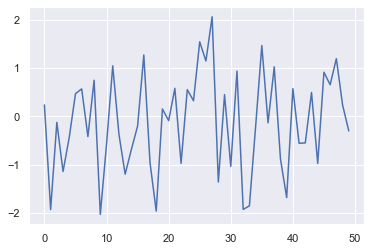

In [4]:
plt.plot(test)

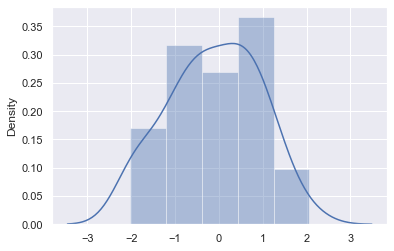

In [5]:
import warnings
warnings.filterwarnings("ignore")
sns.distplot(test);

In [6]:
data1 = np.random.randn(sample1)*sd + rataan1
data2 = np.random.randn(sample2)*sd + rataan2

# menggabungkan sample size
kelompok_data = [sample1, sample2]

batas = [np.min(np.hstack((data1, data2))), np.max(np.hstack((data1, data2)))]

In [7]:
batas

[38.43830194850932, 61.862182333091155]

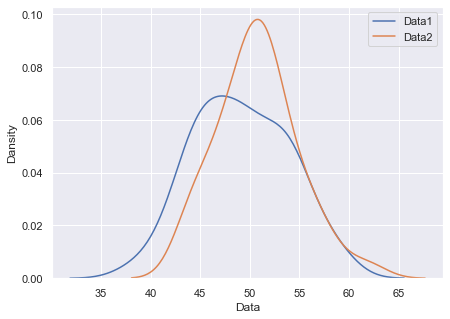

In [8]:
#plot distribusi kedua kelompok (statistik deskriptif)

plt.figure(figsize=(7,5))

a = sns.distplot(data1, hist=False, label='Data1')
a = sns.distplot(data2, hist=False, label='Data2')

a.set(xlabel='Data', ylabel='Dansity')
plt.legend();

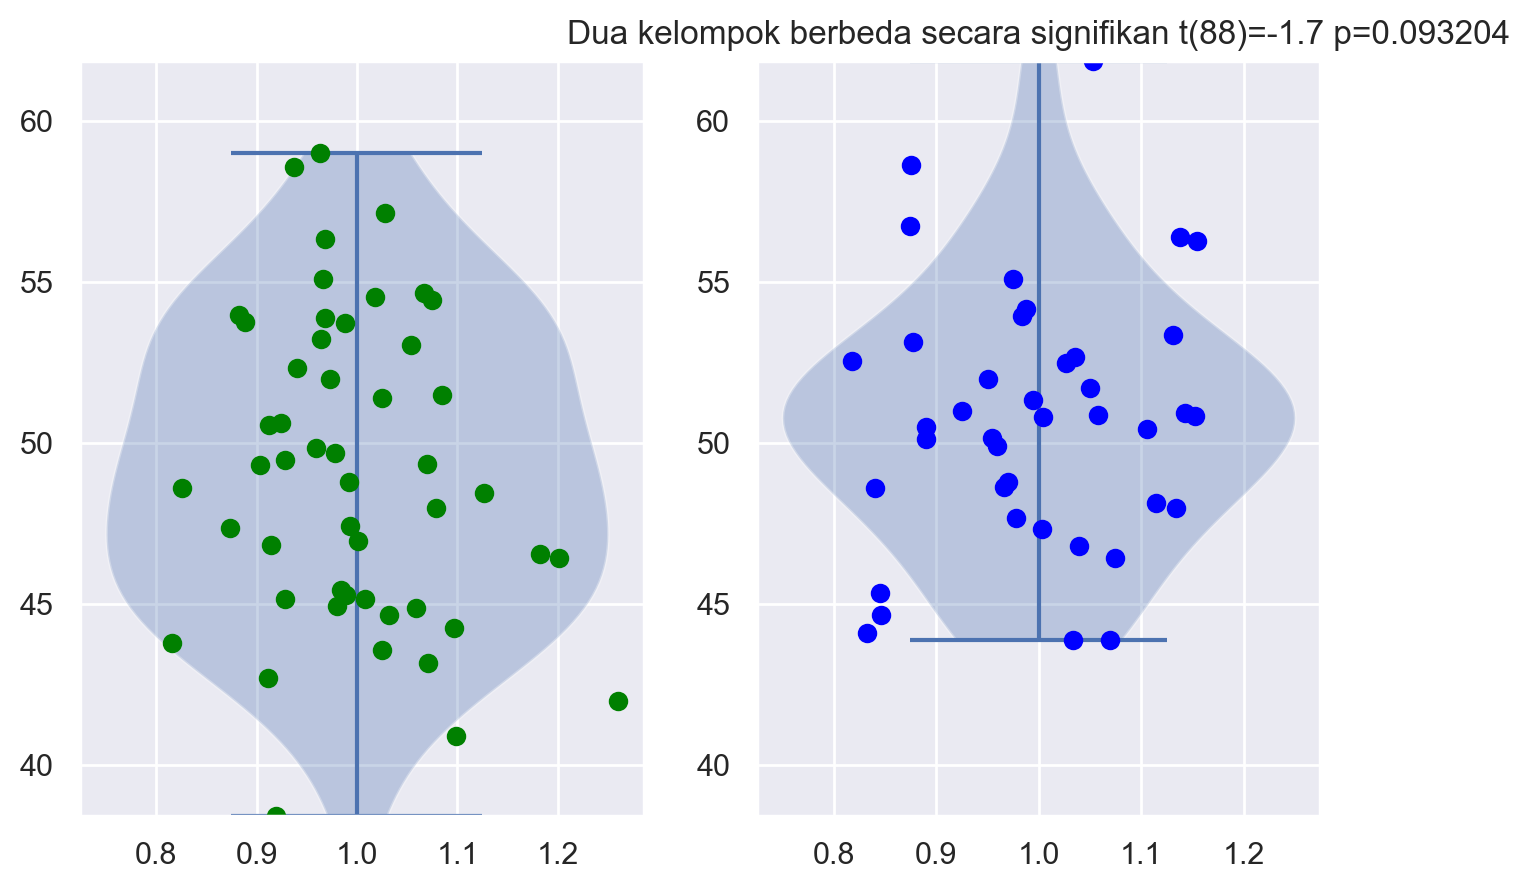

In [9]:
# melakuakan uji statistik inferential
fig, ax = plt.subplots(1,2, figsize=(8,5), dpi = 200)

ax[0].violinplot(data1)
ax[0].plot(1+np.random.randn(sample1)/10, data1, 'o', color='green') 
ax[0].set_ylim(batas)

ax[1].violinplot(data2)
ax[1].plot(1+np.random.randn(sample2)/10, data2, 'o', color='blue') 
ax[1].set_ylim(batas)

# melakukan uji t-test
t,p = stats.ttest_ind(data1, data2)

# mencetak hasil t-test di judul
sigtxt = ('', ' Tidak')
plt.title('Dua kelompok{} berbeda secara signifikan t({})={} p={}'.format(sigtxt[int(p<.05)],
                                                                         sum(kelompok_data)-2,
                                                                         np.round(t,2),
                                                                         np.round(p,6)))
plt.show()

In [10]:
p

0.09320356736465449